In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report 
from sklearn import preprocessing

In [2]:

Fraud_check= pd.read_csv("Fraud_check.csv")
Fraud_check.head(15)


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [3]:
Fraud_check.shape

(600, 6)

In [4]:
Fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
Fraud_check.describe()


,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
Fraud_check.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [8]:
Fraud_check.columns



Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [9]:
Fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
# Visualization

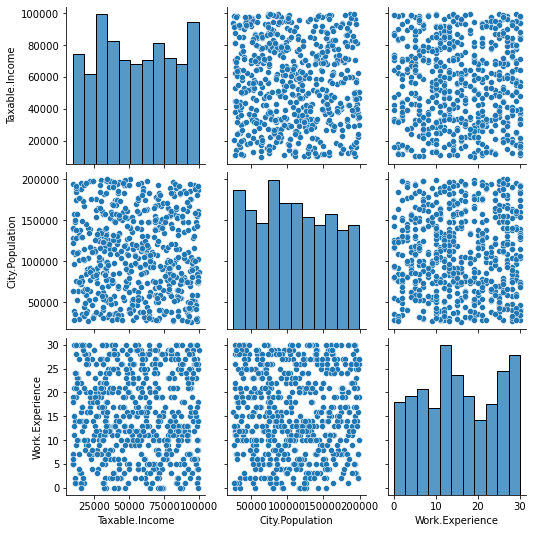

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(Fraud_check)

C:\Users\ANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

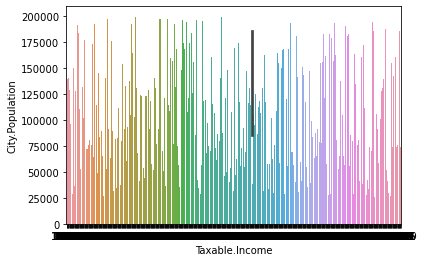

In [12]:
sns.barplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

C:\Users\ANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

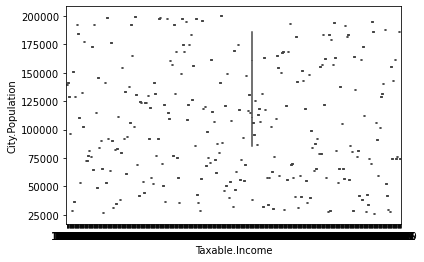

In [13]:
sns.boxplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

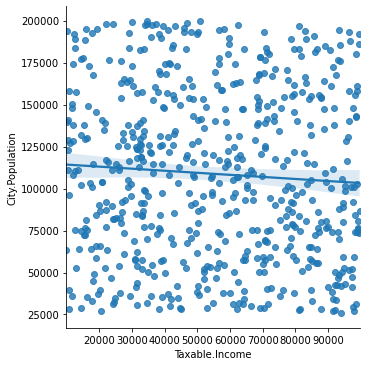

In [14]:
sns.lmplot(x='Taxable.Income',y='City.Population', data=Fraud_check)

C:\Users\ANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


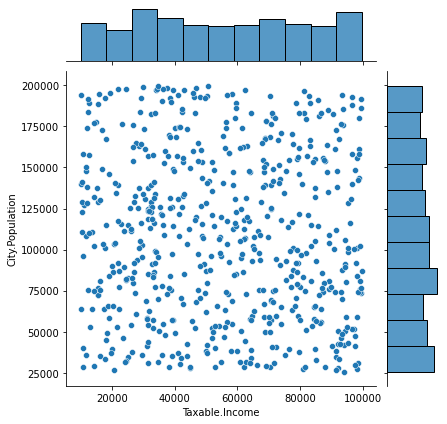

In [15]:
sns.jointplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

C:\Users\ANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

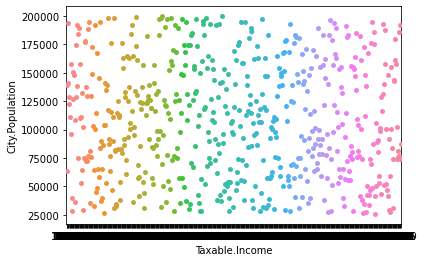

In [16]:
sns.stripplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

C:\Users\ANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

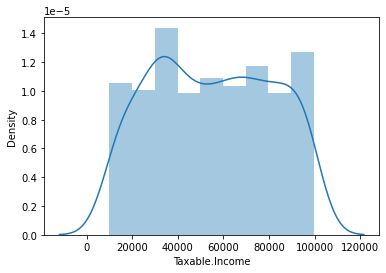

In [17]:
sns.distplot(Fraud_check['Taxable.Income'])

C:\Users\ANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

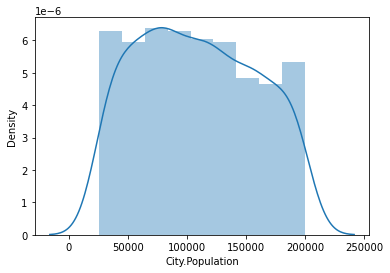

In [18]:
sns.distplot(Fraud_check['City.Population'])

In [19]:
## Preprocessing

In [20]:
Fraud_check.loc[Fraud_check["Taxable.Income"] <= 30000,"Taxable_Income"]="Good"
Fraud_check.loc[Fraud_check["Taxable.Income"] > 30001,"Taxable_Income"]="Risky"

In [21]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Risky
1,YES,Divorced,33700,134075,18,YES,Risky
2,NO,Married,36925,160205,30,YES,Risky
3,YES,Single,50190,193264,15,YES,Risky
4,NO,Married,81002,27533,28,NO,Risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Risky
596,YES,Divorced,69967,55369,2,YES,Risky
597,NO,Divorced,47334,154058,0,YES,Risky
598,YES,Married,98592,180083,17,NO,Risky


In [22]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check["Undergrad"] = label_encoder.fit_transform(Fraud_check["Undergrad"])
Fraud_check["Marital.Status"] = label_encoder.fit_transform(Fraud_check["Marital.Status"])
Fraud_check["Urban"] = label_encoder.fit_transform(Fraud_check["Urban"])
Fraud_check["Taxable_Income"] = label_encoder.fit_transform(Fraud_check["Taxable_Income"])

In [23]:
Fraud_check.drop(['City.Population'],axis=1,inplace=True)
Fraud_check.drop(['Taxable.Income'],axis=1,inplace=True)


In [24]:
Fraud_check["Taxable_Income"].unique()


array([1, 0])

In [25]:
Fraud_check

,Undergrad,Marital.Status,Work.Experience,Urban,Taxable_Income
0,0,2,10,1,1
1,1,0,18,1,1
2,0,1,30,1,1
3,1,2,15,1,1
4,0,1,28,0,1
...,...,...,...,...,...
595,1,0,7,1,1
596,1,0,2,1,1
597,0,0,0,1,1
598,1,1,17,0,1


In [26]:
x = Fraud_check.iloc[:,0:4]
x

,Undergrad,Marital.Status,Work.Experience,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [27]:
y = Fraud_check["Taxable_Income"]
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable_Income, Length: 600, dtype: int32

In [28]:
len(y)

600

In [29]:
colnames=list(Fraud_check.columns)
colnames

['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban', 'Taxable_Income']

In [30]:
## Split into train and Test Data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [32]:
model=DecisionTreeClassifier(criterion="gini")
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [33]:
 # Build Tree Model

[Text(243.78442382812503, 209.07692307692307, 'X[2] <= 24.5\ngini = 0.337\nsamples = 480\nvalue = [103, 377]'),
 Text(175.31553515625, 192.35076923076923, 'X[2] <= 17.5\ngini = 0.362\nsamples = 367\nvalue = [87, 280]'),
 Text(123.83022656250002, 175.62461538461537, 'X[2] <= 11.5\ngini = 0.336\nsamples = 271\nvalue = [58, 213]'),
 Text(77.22632812500001, 158.89846153846153, 'X[2] <= 6.5\ngini = 0.376\nsamples = 175\nvalue = [44, 131]'),
 Text(43.157812500000006, 142.1723076923077, 'X[2] <= 3.5\ngini = 0.307\nsamples = 95\nvalue = [18, 77]'),
 Text(25.633125000000003, 125.44615384615385, 'X[1] <= 1.5\ngini = 0.348\nsamples = 49\nvalue = [11, 38]'),
 Text(12.76425, 108.72, 'X[2] <= 0.5\ngini = 0.404\nsamples = 32\nvalue = [9, 23]'),
 Text(5.022, 91.99384615384615, 'X[0] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(3.3480000000000003, 75.2676923076923, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(1.6740000000000002, 58.541538461538465, 'gini = 0.0\nsamples

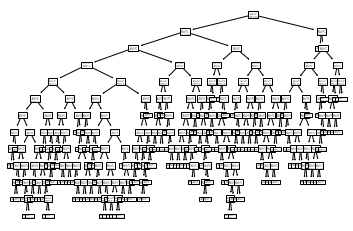

In [34]:
tree.plot_tree(model)

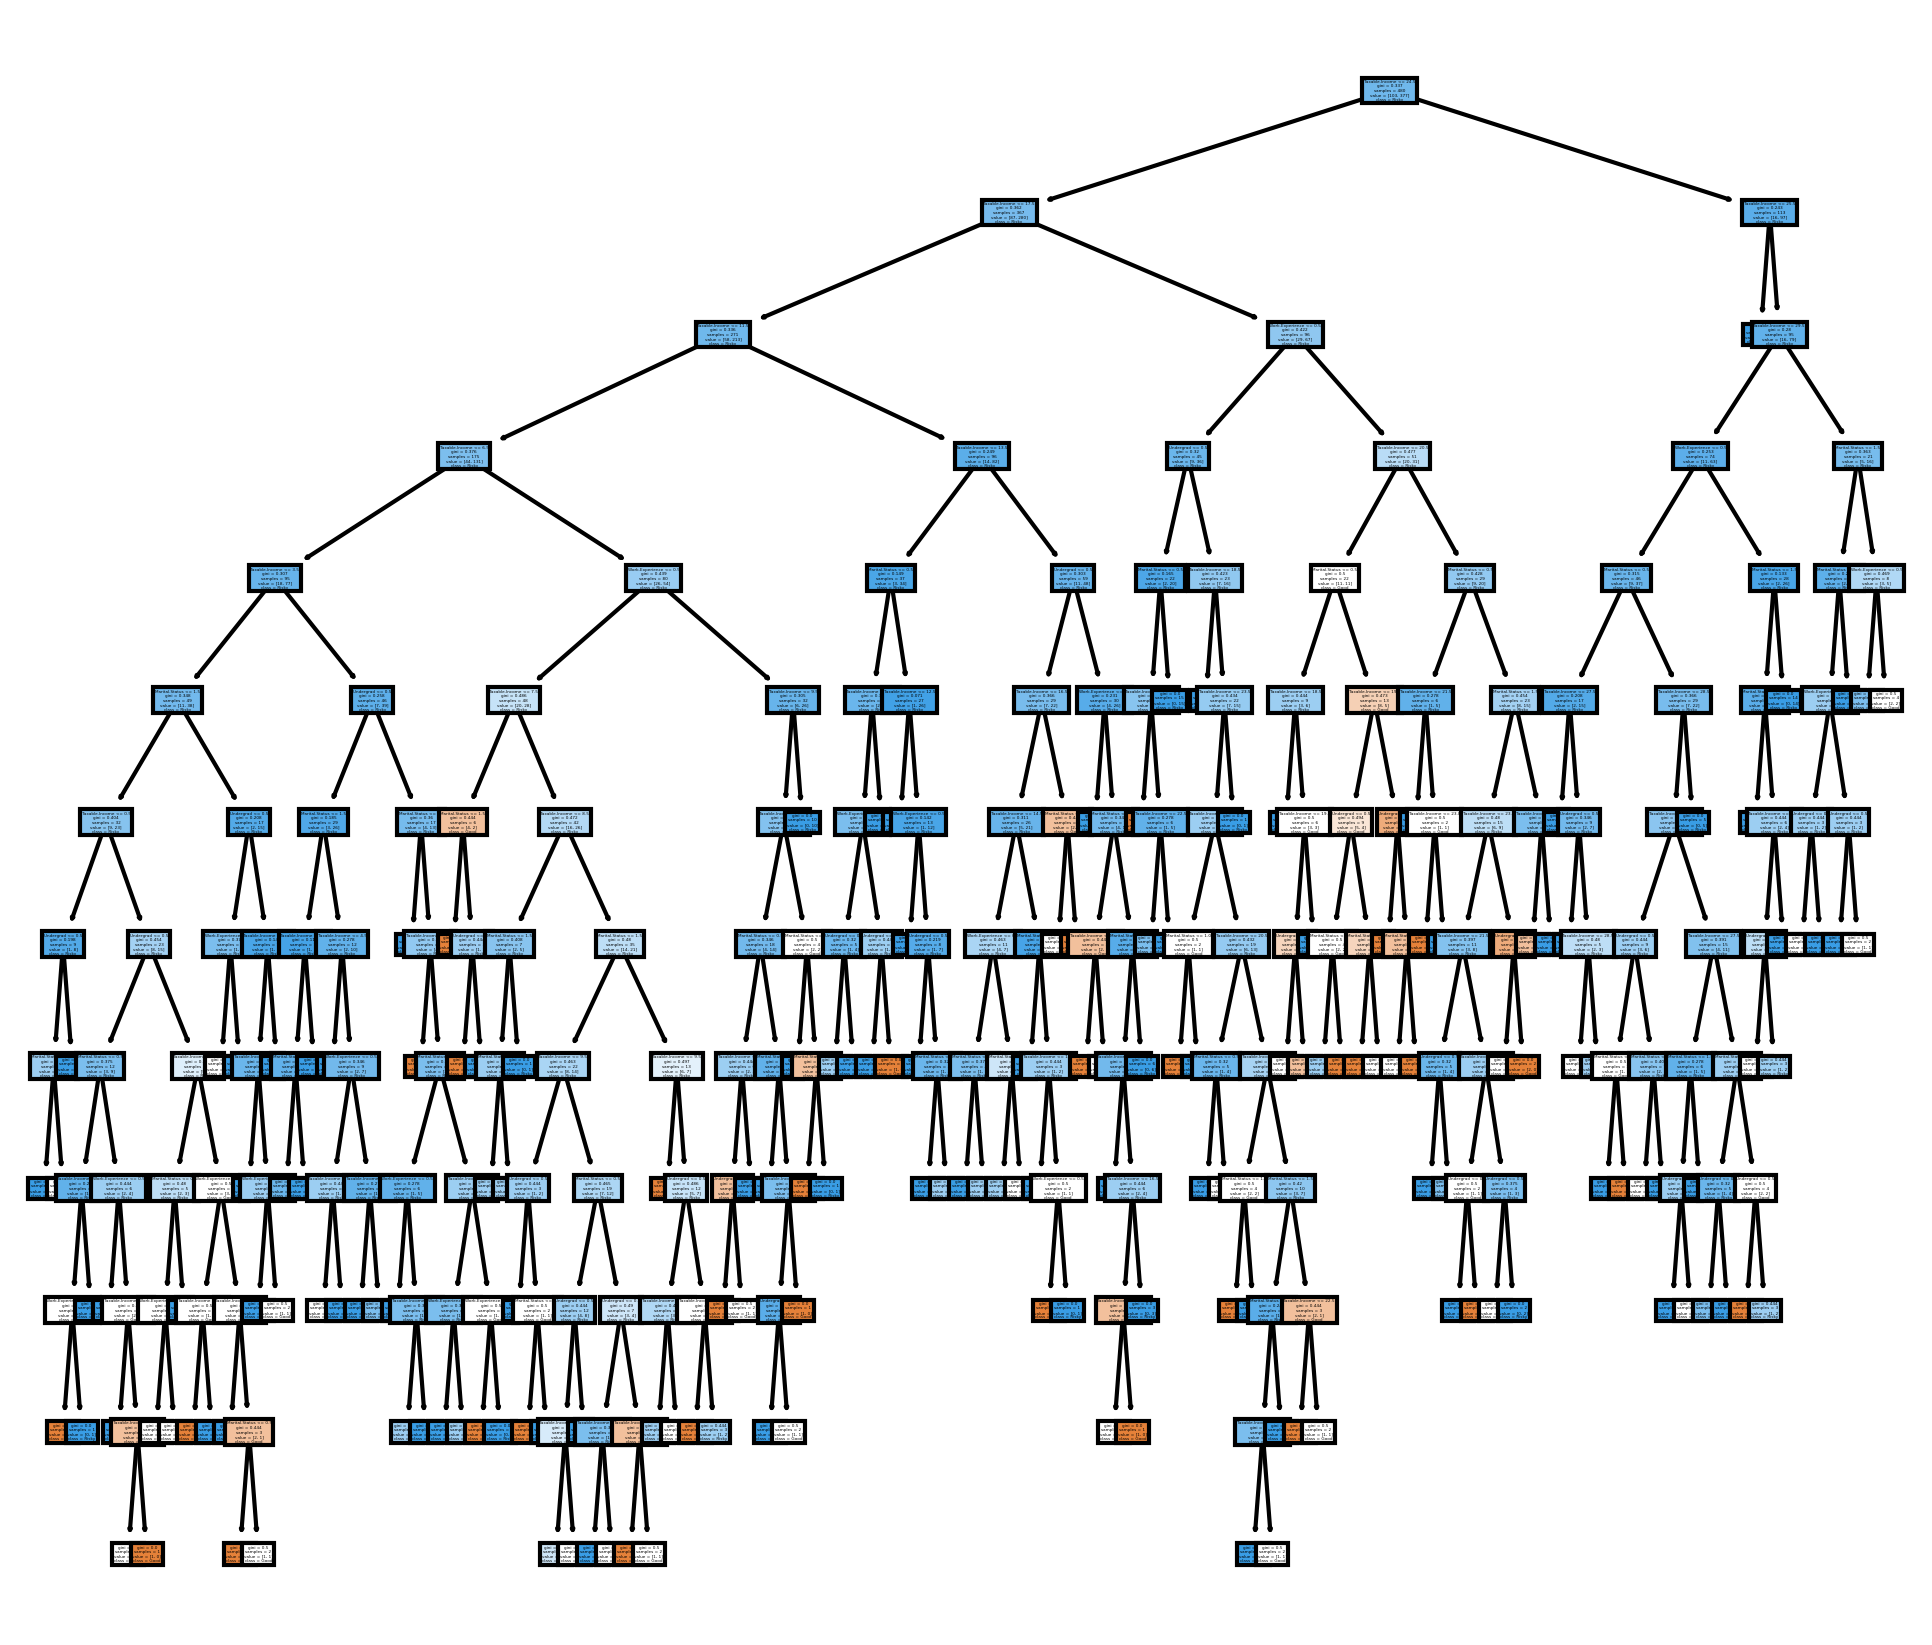

In [35]:
fn=[ 'Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
   'Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,7), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);


In [36]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    96
0    24
dtype: int64

In [37]:
pd.Series(y_test).value_counts()


1    99
0    21
Name: Taxable_Income, dtype: int64

In [38]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable_Income,,
0,6,15
1,18,81


In [39]:
np.mean(preds==y_test)

0.725

In [40]:

array=Fraud_check.values
array

array([[ 0,  2, 10,  1,  1],
       [ 1,  0, 18,  1,  1],
       [ 0,  1, 30,  1,  1],
       ...,
       [ 0,  0,  0,  1,  1],
       [ 1,  1, 17,  0,  1],
       [ 0,  0, 16,  0,  1]], dtype=int64)

In [41]:
X=array[:,0:4]
X

array([[ 0,  2, 10,  1],
       [ 1,  0, 18,  1],
       [ 0,  1, 30,  1],
       ...,
       [ 0,  0,  0,  1],
       [ 1,  1, 17,  0],
       [ 0,  0, 16,  0]], dtype=int64)

In [42]:
Y=array[:,4]
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)


In [44]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()


In [45]:
model1.fit(X_train, Y_train)

DecisionTreeRegressor()

In [46]:
model1.score(X_test, Y_test)

-1.0616883116883122

In [ ]:
#The Regressor method is not best fit for Decision Tree
